In [365]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
from matplotlib.ticker import FuncFormatter

In [366]:
p18 = pd.read_csv('PERS2018.csv')
p19 = pd.read_csv('PERS2019v2.csv')

In [367]:
p18.loc[:,'amount'] = p18.amount.str.replace(',','',regex=True).astype('int')
p18['amount'] = p18.groupby('name')['amount'].transform('sum')
p18=p18.drop_duplicates('name')
p18 = p18.sort_values('amount',ascending=False)
p18.head()

,name,group2,group,type,amount
0,HARBERT GULF PACIFIC POWER (GP,Group 4 - More Fossil Fuels,Group 4 - More Fossil Fuels,Infrastructure Partnerships,1039118102
1,EXXON MOBIL CORP,Group 1 - Production,Group 1 - Production,Equity - Domestic Equity,948272439
2,BERKSHIRE HATHAWAY INC CL B,Group 4 - More Fossil Fuels,Group 0 - CoalExit,Equity - Domestic Equity,723556564
3,CHEVRON CORP,Group 1 - Production,Group 1 - Production,Equity - Domestic Equity,622142180
4,ROYAL DUTCH SHELL PLC A SHS,Group 1 - Production,Group 1 - Production,Equity - International Equity,445211473


In [368]:
p19=p19.dropna()
p19=p19[p19.fund=='CalPERS_20190630']
p19.loc[:,'amount'] = p19.amount.str.replace(',','',regex=True).astype('int')
p19=p19[p19.group!='Group X - N/A']
p19['amount'] = p19.groupby('name')['amount'].transform('sum')
p19=p19.drop_duplicates('name')
p19 = p19.sort_values('amount',ascending=False)
p19.head()

,fund,type,name,amount,group2,group
33442,CalPERS_20190630,Infrastructure Partnerships,HARBERT GULF PACIFIC POWER (GP,1181992633,Group 4 - More Fossil Fuels,Group 4 - More Fossil Fuels
33388,CalPERS_20190630,Domestic Equity,NEXTERA ENERGY INC,758730968,Group 3 - Utility,Group 3 - Utility
33365,CalPERS_20190630,Domestic Equity,EXXON MOBIL CORP,657617663,Group 1 - Production,Group 1 - Production
33347,CalPERS_20190630,Domestic Equity,CHEVRON CORP,602147738,Group 1 - Production,Group 1 - Production
33339,CalPERS_20190630,Domestic Equity,BERKSHIRE HATHAWAY INC CL B,575928637,Group 4 - More Fossil Fuels,Group 0 - Coal Exit


In [369]:

top18=p18[0:10]
top19=p19[0:10]


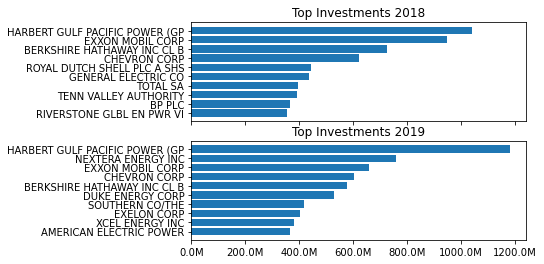

In [370]:
#create 2 subplots: one containing top for p18, the other for p19
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].barh('name','amount',data=top18)
ax[0].set_yticklabels(top18.name)
ax[0].set_title('Top Investments 2018')
ax[0].set_ylim(ax[0].get_ylim()[::-1])
ax[1].barh('name','amount',data=top19)
ax[1].set_yticklabels(top19.name)
ax[1].set_title('Top Investments 2019')
ax[1].set_ylim(ax[1].get_ylim()[::-1])
ax[0].xaxis.set_major_formatter(formatter)

In [371]:
top19.head()

,fund,type,name,amount,group2,group
33442,CalPERS_20190630,Infrastructure Partnerships,HARBERT GULF PACIFIC POWER (GP,1181992633,Group 4 - More Fossil Fuels,Group 4 - More Fossil Fuels
33388,CalPERS_20190630,Domestic Equity,NEXTERA ENERGY INC,758730968,Group 3 - Utility,Group 3 - Utility
33365,CalPERS_20190630,Domestic Equity,EXXON MOBIL CORP,657617663,Group 1 - Production,Group 1 - Production
33347,CalPERS_20190630,Domestic Equity,CHEVRON CORP,602147738,Group 1 - Production,Group 1 - Production
33339,CalPERS_20190630,Domestic Equity,BERKSHIRE HATHAWAY INC CL B,575928637,Group 4 - More Fossil Fuels,Group 0 - Coal Exit


In [372]:
table18 = top18[['name','amount']]


In [373]:
table19 = top19[['name','amount']]

In [374]:
topchange = table18.merge(table19, how='inner',on='name')

In [375]:
topchange['diff'] = topchange.amount_y - topchange.amount_x

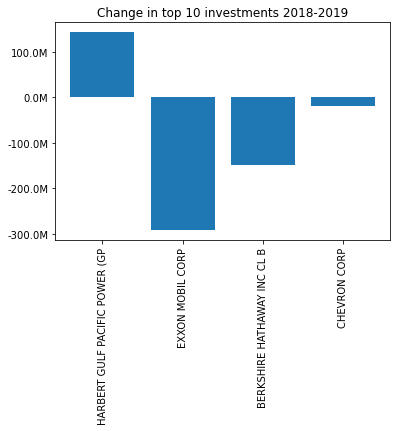

In [376]:
fig, ax = plt.subplots()
ax.bar('name','diff',data=topchange)
ax.set_xticklabels(topchange.name,rotation=90)
ax.set_title('Change in top 10 investments 2018-2019')
def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)
formatter = FuncFormatter(millions)
ax.yaxis.set_major_formatter(formatter)

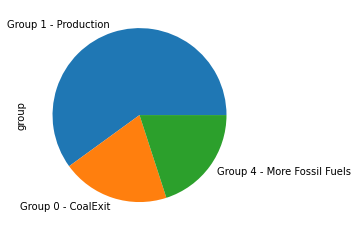

In [377]:
pie18=top18.group.value_counts()
pie.plot.pie()

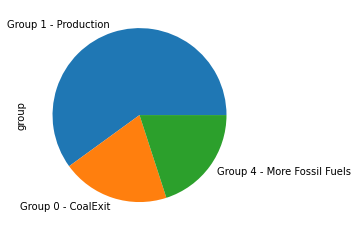

In [378]:
pie19=top19.group.value_counts()
pie.plot.pie()

In [379]:
val1= p18.group.value_counts()
val2=p19.group.value_counts()
val1.reset_index(drop=True, inplace=True)
val2.reset_index(drop=True, inplace=True)
groups = pd.concat([val1,val2],axis=1)
groups.columns=['group18','group19']

In [380]:
groups=groups.iloc[0:5]
groups.index= ['Group 2 - Support','Group 1 - Production','Group 3 - Utility','Group 0 - Coal Exit','Group 4 - More Fossil Fuels']
groups['group']= groups.index

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

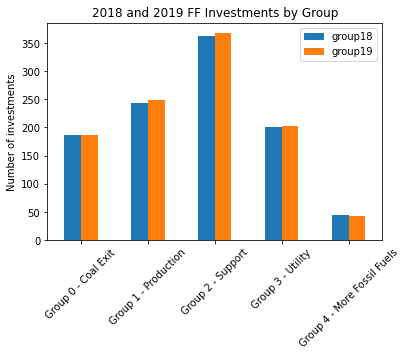

In [381]:
groups = groups.sort_values('group')
groups.plot(x='group',y=['group18','group19'],kind='bar')
plt.title('2018 and 2019 FF Investments by Group')
plt.ylabel('Number of investments')
plt.xlabel('')
plt.xticks(rotation=45)

In [382]:
groups['inc'] = groups.group19 - groups.group18

In [383]:
#groups.plot.pie(y='inc')
#plt.legend().remove()

#plt.title('2018-2019 increases in FF investment by group')

In [384]:
subset1 = p18[['group','amount']]
asset1 = p18.groupby('group').sum()

In [385]:
subset2 = p19[['group','amount']]
asset2 = p19.groupby('group').sum()

In [386]:
dollars_group = asset1.merge(asset2,on='group')
dollars_group.columns = ['amount18','amount19']

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

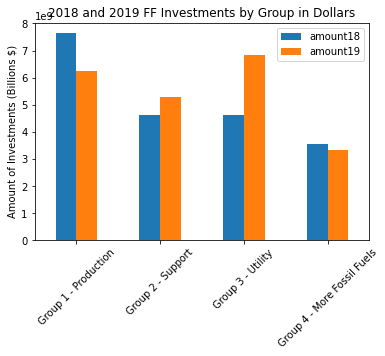

In [387]:
dollars_group = dollars_group.reset_index().sort_values('group')
dollars_group.plot(x='group',y=['amount18','amount19'],kind='bar')
plt.title('2018 and 2019 FF Investments by Group in Dollars')
plt.ylabel('Amount of Investments (Billions $)')
plt.xlabel('')
plt.xticks(rotation=45)

In [388]:
sum(p19.amount)

30408917346

In [389]:
sum(p18.amount)

27610955268

In [390]:
sum(p18.amount<0)

1

In [391]:
sum(p19.amount<0)

0

In [392]:
p5 = p19[p19.group!='Group 5 - Broad Market Fund']

In [393]:
sum(p5.amount)

30308008999

In [394]:
p19.group.value_counts()

Group 2 - Support              368
Group 1 - Production           249
Group 3 - Utility              203
Group 0 - Coal Exit            186
Group 4 - More Fossil Fuels     42
Group 5 - Broad Market Fund      9
Name: group, dtype: int64